#### Telcom Customer Churn
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

### Importing libraries and loading data set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Read the data

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,9386-LDCZR,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

<AxesSubplot:xlabel='Churn', ylabel='count'>

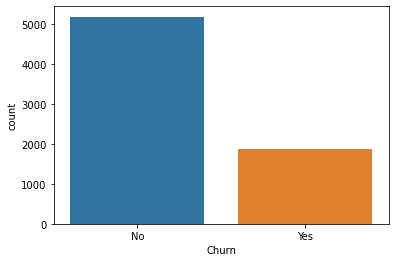

In [6]:
sns.countplot(x='Churn', data=df)

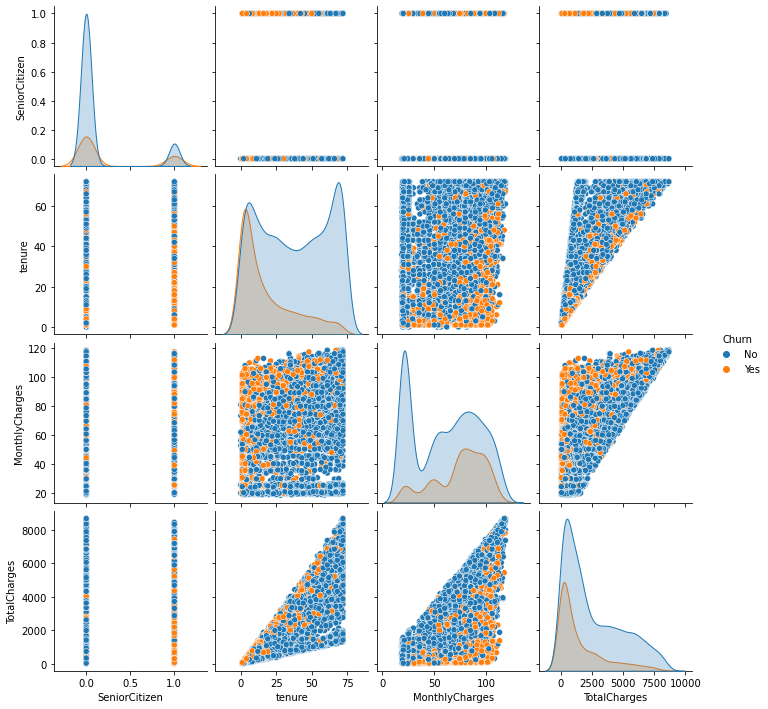

In [7]:
sns.pairplot(df, hue='Churn')

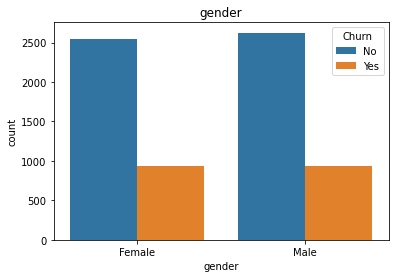

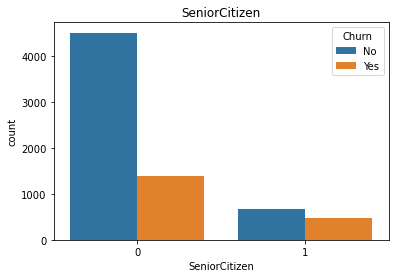

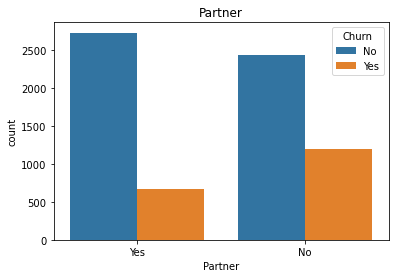

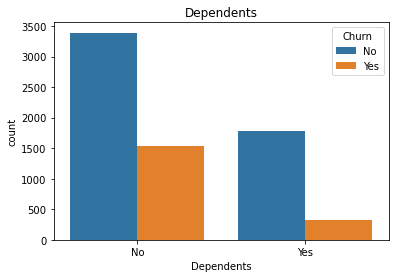

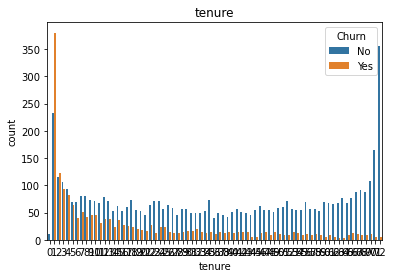

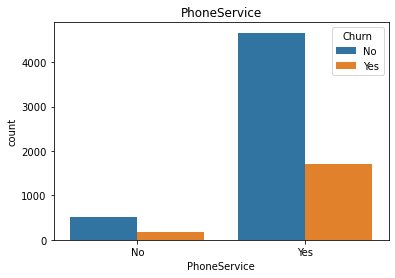

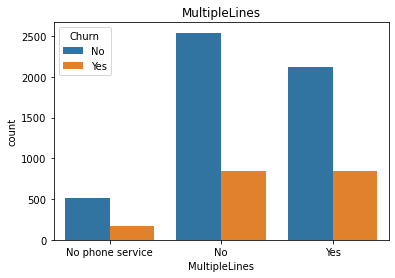

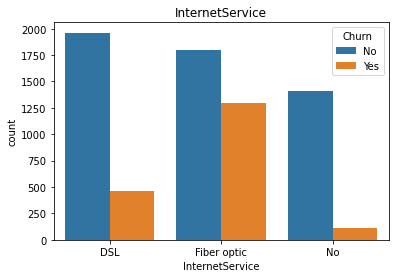

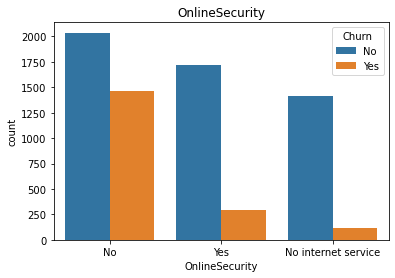

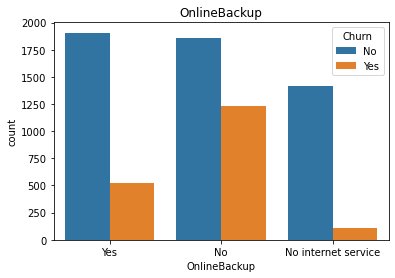

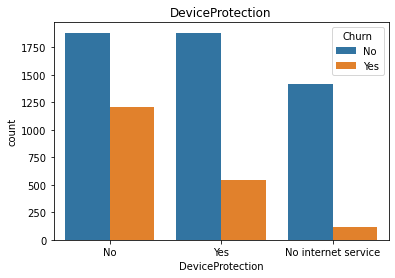

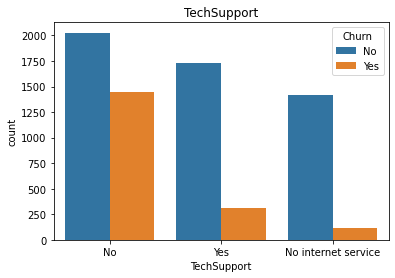

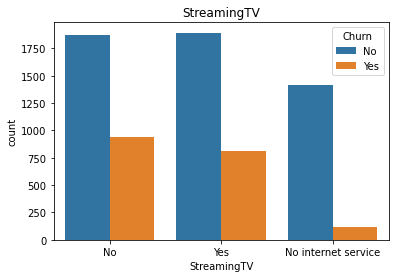

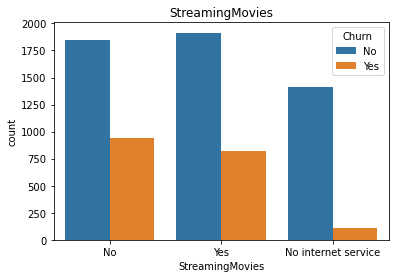

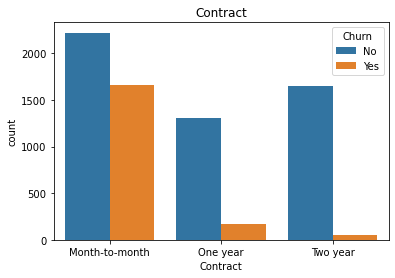

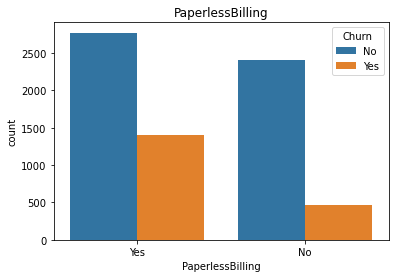

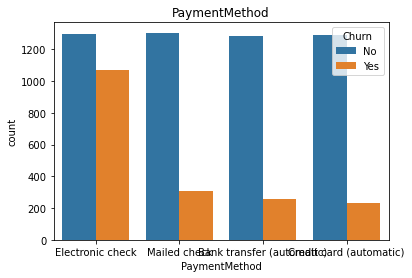

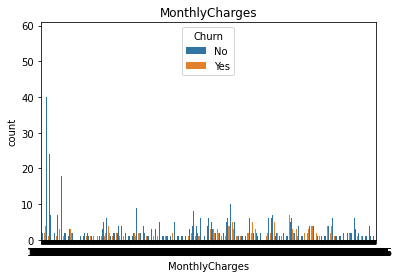

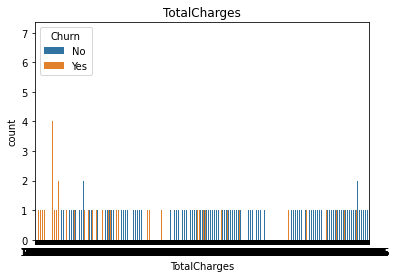

In [8]:
#For every feature plot, the churn can be visualized as follows
for col in df.columns:
    if col not in ['customerID', 'Churn']:
        sns.countplot(x=col, data=df, hue='Churn').set_title(col)
        plt.show()

### Data Preprocessing 

In [9]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [10]:
# Make dummy variables for all categorical variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

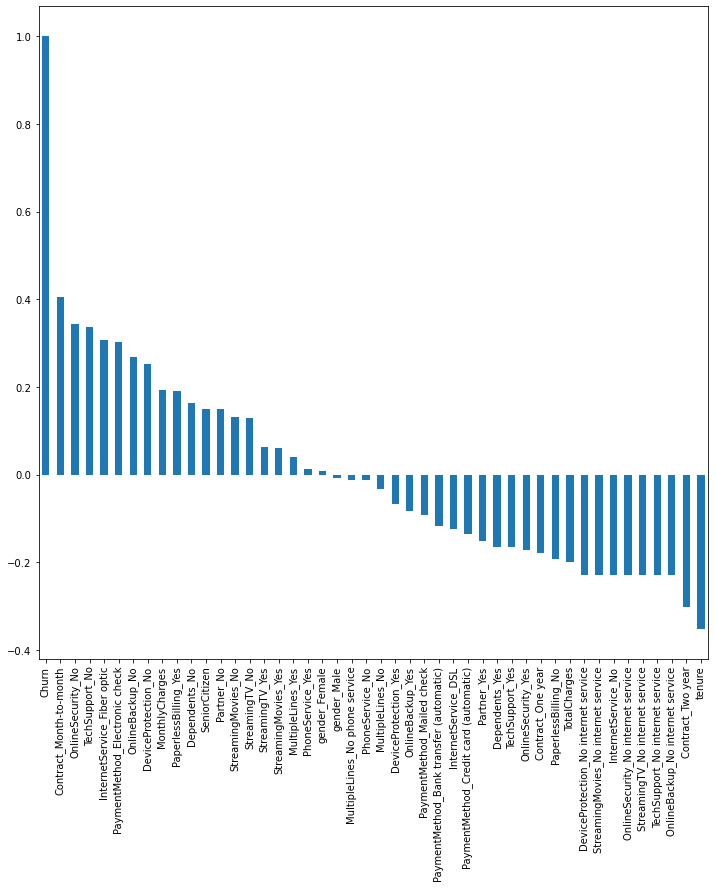

In [11]:
#correlation plot
plt.figure(figsize=(12,12))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [12]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_dummies.astype(float)))
df_scaled.columns = df_dummies.columns
df_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Model Development
We will develop Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost

In [13]:
from sklearn.model_selection import train_test_split
df_scaled = df_scaled.dropna()
X = df_scaled.drop('Churn', axis=1)
y = df_scaled['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
#Logistic Regression
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)
print('Accuracy score of Logistic Regression Classifier on training set: {:.2f} '
      .format(lg.score(X_train, y_train)))
print('Accuracy score of Logistic Regression Classifier on testing set: {:.2f} '
      .format(lg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred_lg))
print(classification_report(y_test, y_pred_lg))

Accuracy score of Logistic Regression Classifier on training set: 0.80 
Accuracy score of Logistic Regression Classifier on testing set: 0.80 
[[1381  168]
 [ 263  298]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [16]:
#Random Forest Classification
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Accuracy score of Random Forest Classifier on training set: {:.2f} '
      .format(rf.score(X_train, y_train)))
print('Accuracy score of Random Forest Classifier on testing set: {:.2f} '
      .format(rf.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy score of Random Forest Classifier on training set: 1.00 
Accuracy score of Random Forest Classifier on testing set: 0.78 
[[1386  163]
 [ 294  267]]
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      1549
         1.0       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [17]:
#Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('Accuracy of SVM classifier on training set: {:.2f}'
        .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
        .format(svm.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.79
[[1397  152]
 [ 292  269]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1549
         1.0       0.64      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [18]:
#Ada Boost Classifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print('Accuracy of Ada Boost classifier on training set: {:.2f}'
        .format(ada.score(X_train, y_train)))
print('Accuracy of Ada Boost classifier on test set: {:.2f}'
        .format(ada.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

Accuracy of Ada Boost classifier on training set: 0.81
Accuracy of Ada Boost classifier on test set: 0.79
[[1384  165]
 [ 276  285]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1549
         1.0       0.63      0.51      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [19]:
#XG Boost Classifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
print('Accuracy of XG Boost classifier on training set: {:.2f}'
        .format(xg.score(X_train, y_train)))
print('Accuracy of XG Boost classifier on test set: {:.2f}'
        .format(xg.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_xg))
print(classification_report(y_test, y_pred_xg))

Accuracy of XG Boost classifier on training set: 0.94
Accuracy of XG Boost classifier on test set: 0.78
[[1361  188]
 [ 277  284]]
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      1549
         1.0       0.60      0.51      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



<AxesSubplot:>

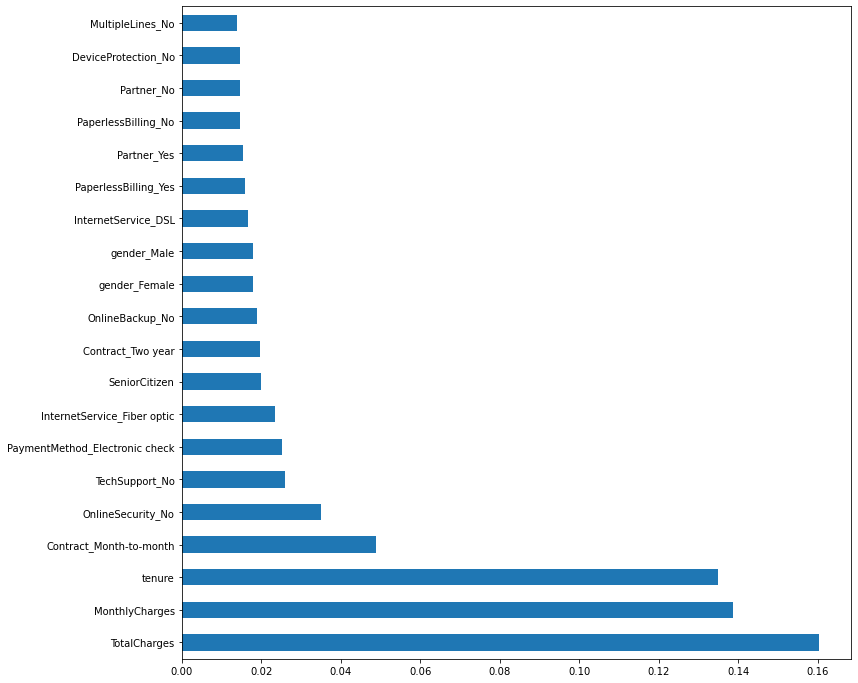

In [20]:
#Feature importance
plt.figure(figsize=(12,12))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [21]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Random Forest
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_params_)
print(CV_rf.best_score_)
y_pred_rf = CV_rf.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
        .format(CV_rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
        .format(CV_rf.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91769\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
0.8061770046634477
Accuracy of Random Forest classifier on training set: 0.84
Accuracy of Random Forest classifier on test set: 0.80
[[1410  139]
 [ 289  272]]
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1549
         1.0       0.66      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



In [22]:
# XGBoost
xgb = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [4,5,6,7,8],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2]
}
CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 5)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_score_)
y_pred_xgb = CV_xgb.predict(X_test)
print('Accuracy of XGBoost classifier on training set: {:.2f}'
        .format(CV_xgb.score(X_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
        .format(CV_xgb.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
0.8017083488093764
Accuracy of XGBoost classifier on training set: 0.82
Accuracy of XGBoost classifier on test set: 0.80
[[1389  160]
 [ 267  294]]
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



<AxesSubplot:>

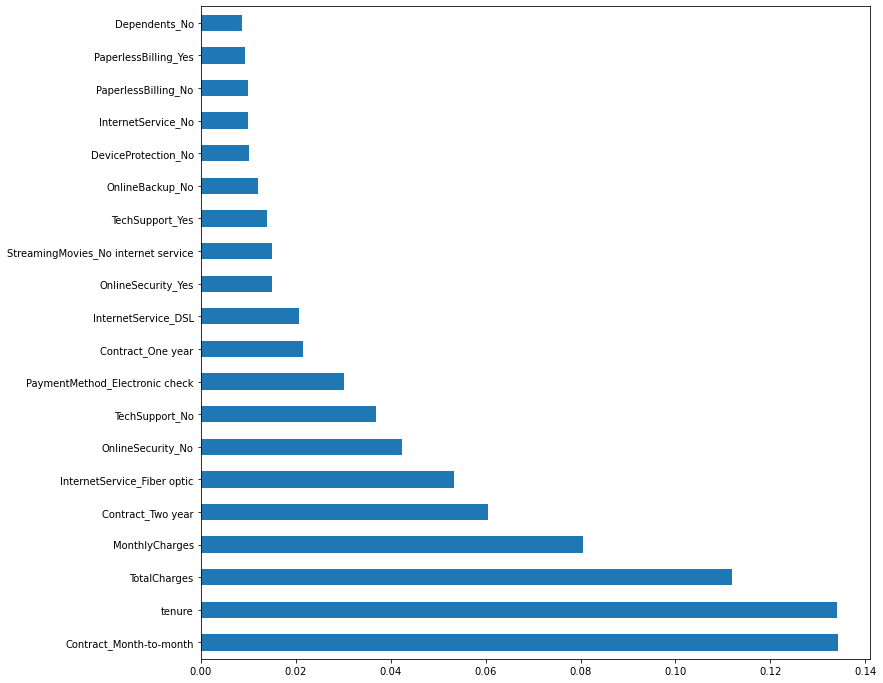

In [23]:
# Feature Importance
plt.figure(figsize=(12,12))
feat_importances = pd.Series(CV_rf.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [27]:
# compare the models
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'AdaBoost', 'XGBoost'],
    'Score': [lg.score(X_test, y_test), CV_rf.score(X_test, y_test), svm.score(X_test, y_test), ada.score(X_test, y_test), CV_xgb.score(X_test, y_test)],
    'Train Score': [lg.score(X_train, y_train), CV_rf.score(X_train, y_train), svm.score(X_train, y_train), ada.score(X_train, y_train), CV_xgb.score(X_train, y_train)]
    , 'Best Params': ['-', CV_rf.best_params_, '-', '-', CV_xgb.best_params_]
    , 'Best Score': ['-', CV_rf.best_score_, '-', '-', CV_xgb.best_score_]
    , 'Confusion Matrix': [confusion_matrix(y_test, y_pred_lg), confusion_matrix(y_test, y_pred_rf), confusion_matrix(y_test, y_pred_svm), confusion_matrix(y_test, y_pred_ada), confusion_matrix(y_test, y_pred_xgb)]})
models.sort_values(by='Score', ascending=False)

,Model,Score,Train Score,Best Params,Best Score,Confusion Matrix
4,XGBoost,0.797630,0.818163,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.801708,"[[1389, 160], [267, 294]]"
1,Random Forest,0.797156,0.835433,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.806177,"[[1410, 139], [289, 272]]"
0,Logistic Regression,0.795735,0.803332,-,-,"[[1381, 168], [263, 298]]"
3,AdaBoost,0.790995,0.809224,-,-,"[[1384, 165], [276, 285]]"
2,SVM,0.789573,0.819992,-,-,"[[1397, 152], [292, 269]]"
